In [1]:
import gensim

import gensim.corpora as corpora
from gensim.models import LdaModel

import utils.filemanagement
from utils.filemanagement import get_project_root
from utils.filemanagement import load_from_file
from pprint import pprint
import os
from utils.config import random_sample,seed

In [2]:
from utils.filemanagement import load_from_file, write_topics_file, get_project_root

NUM_TOPICS = 20
TOPN = 20
model_type = "lda"
model_name="LDA"
data_type = "np_mini_stopwords"
passes = 1000
decay = 0.5
embedding_model = f"embedding_p{passes}_t{NUM_TOPICS}"
experiment="embedding"
file_name = f"{model_type}_{embedding_model}_{data_type}"
folder_path_data =f"preprocessed_data"

file_name_data = f"{data_type}.csv"

df = load_from_file(folder_path_data,file_name_data)
folder_path_topics = f"preprocessed_data/results/embedding/{model_type}"
folder_path_word_cloud = f"preprocessed_data/wordclouds/{experiment}/{model_type}/{file_name}"

folder_name = f"Embedding-experiment/models/{model_type}"

ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)






In [3]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations


data = df.text.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))


data_words = list(sent_to_words(new_data))

In [4]:
import os
from gensim.models import LdaMulticore

id2word = corpora.Dictionary(data_words)
texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]
folder_name = f"Embedding-experiment/models/{model_type}"
ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)

try:
    lda = LdaMulticore.load(file_path)
except:
    lda = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=NUM_TOPICS,
                                     random_state=42,
                                     passes=passes,
                                     decay=decay,
                                      )
    LdaMulticore.save(lda, file_path)

In [5]:
lda.get_topics()

array([[4.22591111e-04, 5.34431718e-04, 2.67591258e-06, ...,
        2.67591258e-06, 2.67591258e-06, 2.67591258e-06],
       [4.26462793e-04, 6.44706506e-06, 6.44706506e-06, ...,
        6.44706506e-06, 6.44706506e-06, 6.44706506e-06],
       [3.68341542e-04, 8.52203084e-06, 8.52200446e-06, ...,
        8.52200446e-06, 8.52200446e-06, 8.52200446e-06],
       ...,
       [4.43780766e-04, 1.20373625e-04, 6.82929522e-06, ...,
        6.82929522e-06, 6.82929522e-06, 6.82929522e-06],
       [1.21981304e-06, 5.04130148e-04, 1.21981304e-06, ...,
        1.21981304e-06, 1.21981304e-06, 1.21981304e-06],
       [6.28953043e-04, 1.24319387e-03, 6.14003511e-05, ...,
        1.50128494e-06, 1.50128494e-06, 1.50128494e-06]], dtype=float32)

In [6]:
lda.get_topic_terms(0,5)

[(557, 0.018546466),
 (818, 0.0067752968),
 (596, 0.006515786),
 (2786, 0.006457224),
 (1914, 0.005996381)]

In [7]:
topic_words = [[] for i in range(NUM_TOPICS)]

for i in range(NUM_TOPICS):
    r = lda.get_topic_terms(i,TOPN)
    for item in r:
        topic_words[i].append(id2word[item[0]])

In [8]:
from utils.filemanagement import write_topics_file

topic_words_numbered = [(i, topic_words[i]) for i in range(NUM_TOPICS)]

write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [9]:

# Print the Keyword in the 10 topics
pprint(lda.print_topics())
doc_lda = lda[corpus]

[(0,
  '0.019*"land" + 0.007*"norge" + 0.007*"usa" + 0.006*"bistand" + '
  '0.006*"verden" + 0.005*"fn" + 0.005*"krig" + 0.004*"irak" + 0.004*"fattige" '
  '+ 0.004*"internasjonale"'),
 (1,
  '0.005*"norge" + 0.005*"fn" + 0.004*"sverige" + 0.003*"kulturelle" + '
  '0.003*"skolesekken" + 0.003*"fns" + 0.003*"behov" + 0.003*"samarbeid" + '
  '0.002*"motsegner" + 0.002*"forsøket"'),
 (2,
  '0.008*"toget" + 0.007*"regjering" + 0.006*"sv" + 0.006*"venstre" + '
  '0.006*"høgre" + 0.004*"byggja" + 0.004*"representanten" + 0.003*"pengar" + '
  '0.003*"gasskraftverk" + 0.003*"tog"'),
 (3,
  '0.028*"barn" + 0.010*"barnevernet" + 0.010*"barna" + 0.005*"norge" + '
  '0.005*"hjelp" + 0.005*"ønsker" + 0.004*"trenger" + 0.004*"tiltak" + '
  '0.004*"unge" + 0.004*"barnet"'),
 (4,
  '0.009*"statsraden" + 0.007*"biler" + 0.004*"ansatte" + 0.003*"bil" + '
  '0.003*"funksjonsevne" + 0.003*"representanten" + 0.002*"administrasjon" + '
  '0.002*"offentlig" + 0.002*"dessverre" + 0.002*"takker"'),
 (5,
  '0.0

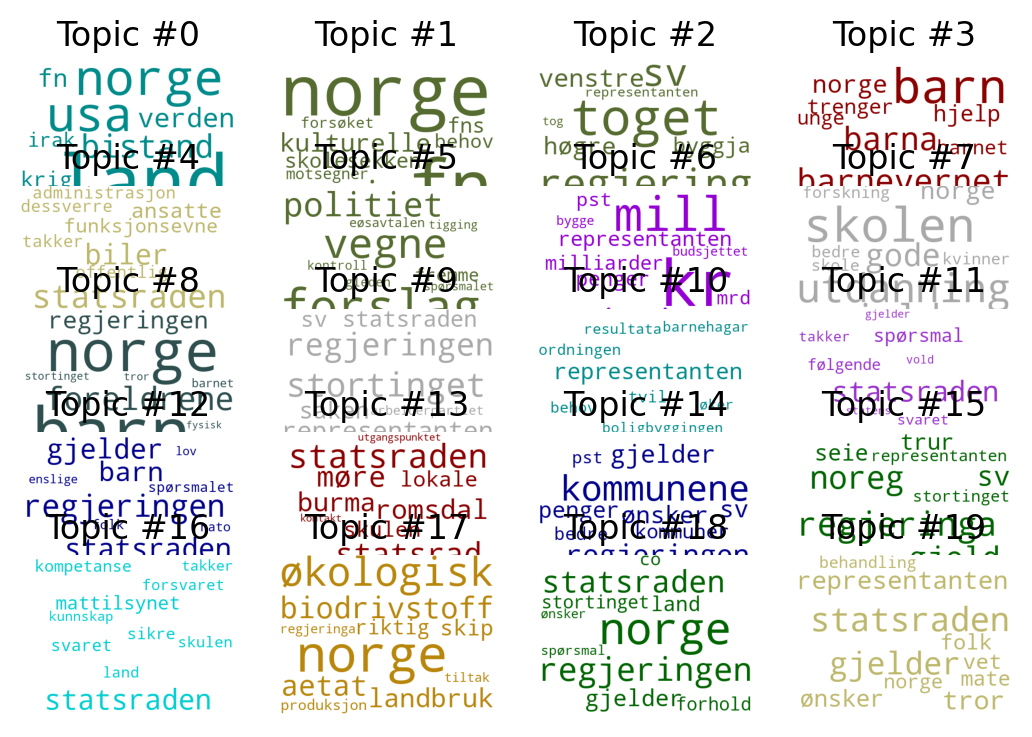

In [10]:
from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds([dict(lda.show_topic(i)) for i in range(NUM_TOPICS)], f"{model_name}: {data_type}", NUM_TOPICS, dpi=200)

In [11]:
formatted_topics = [dict(lda.show_topic(i)) for i in range(NUM_TOPICS)]
print(formatted_topics)

[{'land': 0.018546466, 'norge': 0.0067752968, 'usa': 0.006515786, 'bistand': 0.006457224, 'verden': 0.005996381, 'fn': 0.0051219133, 'krig': 0.004730368, 'irak': 0.0044324854, 'fattige': 0.00417839, 'internasjonale': 0.003815327}, {'norge': 0.0053696926, 'fn': 0.00531726, 'sverige': 0.003526378, 'kulturelle': 0.0034432036, 'skolesekken': 0.0032295296, 'fns': 0.0031653289, 'behov': 0.0026156271, 'samarbeid': 0.0025890763, 'motsegner': 0.0024556688, 'forsøket': 0.0022895304}, {'toget': 0.0076948744, 'regjering': 0.0070353136, 'sv': 0.006209712, 'venstre': 0.0061795614, 'høgre': 0.005698344, 'byggja': 0.0044392194, 'representanten': 0.0035777034, 'pengar': 0.003349787, 'gasskraftverk': 0.0031553672, 'tog': 0.0029826136}, {'barn': 0.02779491, 'barnevernet': 0.010341309, 'barna': 0.009996634, 'norge': 0.0054614176, 'hjelp': 0.004588796, 'ønsker': 0.0045641246, 'trenger': 0.0038583286, 'tiltak': 0.003856503, 'unge': 0.0035324486, 'barnet': 0.003507633}, {'statsraden': 0.009256122, 'biler': 0

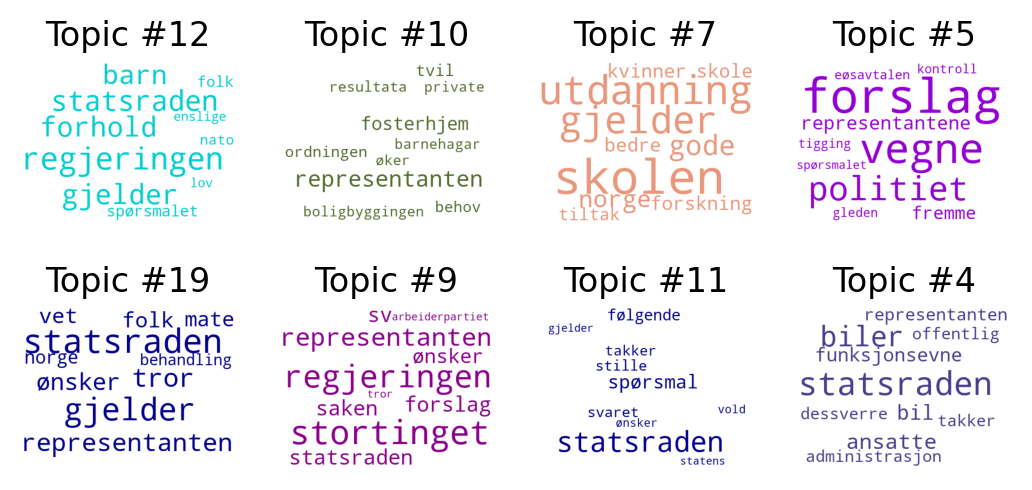

In [12]:
from utils.filemanagement import make_excerpt_wordcloud


excerpt_wordcloud = make_excerpt_wordcloud(formatted_topics,NUM_TOPICS,f"Sample from {model_name}-{embedding_model}: {data_type}",random_sample=random_sample,seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"),bbox_inches="tight")

In [13]:
from utils.tables_and_plots import create_wordcloud

file_name_model = "wordcloud"
print(file_name)

for i in range(NUM_TOPICS):
    topic_wordcloud = create_wordcloud(dict(lda.show_topic(i)))
    full_wordcloud_folder_path = os.path.join(ROOT_PATH, folder_path_word_cloud)
    #full_wordcloud_file_path = os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png"))
    if not os.path.exists(full_wordcloud_folder_path):
        os.mkdir(full_wordcloud_folder_path)
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))

lda_embedding_p1000_t20_np_mini_stopwords


In [14]:
lda.show_topic(1)

[('norge', 0.0053696926),
 ('fn', 0.00531726),
 ('sverige', 0.003526378),
 ('kulturelle', 0.0034432036),
 ('skolesekken', 0.0032295296),
 ('fns', 0.0031653289),
 ('behov', 0.0026156271),
 ('samarbeid', 0.0025890763),
 ('motsegner', 0.0024556688),
 ('forsøket', 0.0022895304)]

In [15]:
# Save topic words of model to file

topics = lda.show_topics(num_topics = NUM_TOPICS,num_words=20, formatted=False)
topic_words = []
for i in range(len(topics)):
    topic_word_list = []
    for j in range(len(topics[i][1])):
        topic_word_list.append(topics[i][1][j][0])
    topic_words.append((i, topic_word_list))

write_topics_file(folder_path_topics, file_name, topic_words)

In [16]:
from utils.filemanagement import load_model_topics

loaded_topics = load_model_topics(folder_path_topics, file_name)

folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [17]:
from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [18]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [19]:
from utils.stats import compute_metrics

coherence, diversity = compute_metrics(
    loaded_topics.values(), word_frequencies, word_co_frequencies, 10)

10
('norge', 'regjeringen') wordtuple
('norge', 'regjeringen') wordup
2675.0 over
4384958.0 under
-10.6788084174644 -11.385323176175872 0.9379451292002079 ('norge', 'regjeringen') 2675 2017 2174
('norge', 'statsraden') wordtuple
('gjelder', 'norge') wordtuple
('gjelder', 'norge') wordup
1904.0 over
3555971.0 under
-10.8669943646252 -10.894817763307943 0.9974461804421871 ('gjelder', 'norge') 1904 2017 1763
('land', 'norge') wordtuple
('land', 'norge') wordup
2506.0 over
1809249.0 under
-9.495788844210363 -11.291170699321862 0.8409924087659637 ('land', 'norge') 2506 2017 897
('norge', 'stortinget') wordtuple
('norge', 'stortinget') wordup
1216.0 over
3077942.0 under
-11.305607102003908 -10.247927513443587 1.1032091207878685 ('norge', 'stortinget') 1216 2017 1526
('forhold', 'norge') wordtuple
('forhold', 'norge') wordup
1040.0 over
2158190.0 under
-11.019022636873018 -10.022367813028454 1.0994430500294525 ('forhold', 'norge') 1040 2017 1070
('co', 'norge') wordtuple
('norge', 'spørsmal')

In [20]:
from nltk import word_tokenize
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

-0.08465197812700384


In [21]:
print(diversity)
print(coherence)

0.66
1.0891036276155974


In [22]:
# Check the stats for the dataset after running basic pipeline
from tabulate import tabulate
import csv
models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒═══════════════════════════════════════════╤═══════════╤═════════╕
│ Model                                     │ Metric    │   Value │
╞═══════════════════════════════════════════╪═══════════╪═════════╡
│ lda_embedding_p1000_t20_np_mini_stopwords │ coherence │  1.0891 │
├───────────────────────────────────────────┼───────────┼─────────┤
│ lda_embedding_p1000_t20_np_mini_stopwords │ diversity │  0.66   │
╘═══════════════════════════════════════════╧═══════════╧═════════╛


In [23]:
# Save all topic stats to file

topic_stats_folder_path = f"preprocessed_data/metrics/{experiment}/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})